In [1]:
print(f'hello there')

hello there


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from datasets import load_dataset

dataset = load_dataset("vkovenko/cross_domain_uk_reviews")

/opt/anaconda3/envs/int_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 662907/662907 [00:00<00:00, 5217434.55 examples/s]


In [3]:
train_data = dataset["train"]
val_data = dataset["validation"]
test_data = dataset["test"]

In [7]:
df_train = pd.read_csv('processed_data.csv')
df_train.head()

/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/4207227997.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('processed_data.csv')


,review,review_translate,rating,entity_name,dataset_name,title_translate,translated,review_translate_sentences,review_translate_sentences_tokens,review_translate_sentences_pos,review_translate_sentences_lemma,is_question
0,"Якісна пластмаса, переворот 360 градусвв","Якісна пластмаса , переворот 360 градусвв",5.0,screechers_wild_eu684204,rozetka,NaN,False,"['Якісна пластмаса , переворот 360 градусвв']","[['Якісна', 'пластмаса', ',', 'переворот', '36...","[['ADJF', 'NOUN', 'PNCT', 'NOUN', 'NUMB', 'NOU...","[['якісний', 'пластмаса', ',', 'переворот', '3...",[False]
1,За такі гроші це самий топ,За такі гроші це самий топ,5.0,xiaomi_hsej03jy_black,rozetka,NaN,False,['За такі гроші це самий топ'],"[['За', 'такі', 'гроші', 'це', 'самий', 'топ']]","[['ADVB', 'NPRO', 'NOUN', 'PRCL', 'NPRO', 'UNK...","[['за', 'такий', 'гріш', 'це', 'самий', 'топ']]",[False]
2,За такі гроші - просто супер! Рекомендую.,За такі гроші - просто супер ! Рекомендую .,5.0,esperanza_eza108,rozetka,NaN,False,"['За такі гроші - просто супер !', 'Рекомендую...","[['За', 'такі', 'гроші', '-', 'просто', 'супер...","[['ADVB', 'NPRO', 'NOUN', 'PNCT', 'PRCL', 'NOU...","[['за', 'такий', 'гріш', '-', 'просто', 'супер...","[False, False]"
3,Виконує свою роботу не погано.але що ви хотіли...,Виконує свою роботу не погано . але що ви хоті...,4.0,voin_v_80,rozetka,NaN,False,"['Виконує свою роботу не погано .', 'але що ви...","[['Виконує', 'свою', 'роботу', 'не', 'погано',...","[['VERB', 'NPRO', 'NOUN', 'PRCL', 'NOUN', 'PNC...","[['виконувати', 'свій', 'робот', 'не', 'погана...","[False, True, True, False, False]"
4,Купляв на стару сістему як основний під віндов...,Купляв на стару сістему як основний під віндов...,4.0,kingston_sa400s37_240g,rozetka,NaN,False,['Купляв на стару сістему як основний під вінд...,"[['Купляв', 'на', 'стару', 'сістему', 'як', 'о...","[['VERB', 'INTJ', 'ADJF', 'NOUN', 'PRCL', 'ADJ...","[['купляти', 'на', 'старий', 'сістема', 'як', ...","[False, False]"


In [8]:
df_train['dataset_name'].value_counts()

dataset_name
rozetka                            391784
tripadvisor_restaurants_ukraine    191191
tripadvisor_hotels_ukraine          79932
Name: count, dtype: int64

In [23]:
df_rozetka = df_train[(df_train["dataset_name"] == "rozetka") & (df_train["translated"] == False)]

In [24]:
df_rozetka["sentiment"] = df_rozetka["rating"].apply(lambda x: "Negative" if x in [1, 2] else "Neutral" if x == 3 else "Positive")

/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/2964835458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rozetka["sentiment"] = df_rozetka["rating"].apply(lambda x: "Negative" if x in [1, 2] else "Neutral" if x == 3 else "Positive")


In [48]:
df_rozetka.head()

,review,review_translate,rating,entity_name,dataset_name,title_translate,translated,review_translate_sentences,review_translate_sentences_tokens,review_translate_sentences_pos,review_translate_sentences_lemma,is_question,sentiment,review_length
0,"Якісна пластмаса, переворот 360 градусвв","Якісна пластмаса , переворот 360 градусвв",5.0,screechers_wild_eu684204,rozetka,NaN,False,"['Якісна пластмаса , переворот 360 градусвв']","[['Якісна', 'пластмаса', ',', 'переворот', '36...","[['ADJF', 'NOUN', 'PNCT', 'NOUN', 'NUMB', 'NOU...","[['якісний', 'пластмаса', ',', 'переворот', '3...",[False],Positive,41
1,За такі гроші це самий топ,За такі гроші це самий топ,5.0,xiaomi_hsej03jy_black,rozetka,NaN,False,['За такі гроші це самий топ'],"[['За', 'такі', 'гроші', 'це', 'самий', 'топ']]","[['ADVB', 'NPRO', 'NOUN', 'PRCL', 'NPRO', 'UNK...","[['за', 'такий', 'гріш', 'це', 'самий', 'топ']]",[False],Positive,27
2,За такі гроші - просто супер! Рекомендую.,За такі гроші - просто супер ! Рекомендую .,5.0,esperanza_eza108,rozetka,NaN,False,"['За такі гроші - просто супер !', 'Рекомендую...","[['За', 'такі', 'гроші', '-', 'просто', 'супер...","[['ADVB', 'NPRO', 'NOUN', 'PNCT', 'PRCL', 'NOU...","[['за', 'такий', 'гріш', '-', 'просто', 'супер...","[False, False]",Positive,42
3,Виконує свою роботу не погано.але що ви хотіли...,Виконує свою роботу не погано . але що ви хоті...,4.0,voin_v_80,rozetka,NaN,False,"['Виконує свою роботу не погано .', 'але що ви...","[['Виконує', 'свою', 'роботу', 'не', 'погано',...","[['VERB', 'NPRO', 'NOUN', 'PRCL', 'NOUN', 'PNC...","[['виконувати', 'свій', 'робот', 'не', 'погана...","[False, True, True, False, False]",Positive,153
4,Купляв на стару сістему як основний під віндов...,Купляв на стару сістему як основний під віндов...,4.0,kingston_sa400s37_240g,rozetka,NaN,False,['Купляв на стару сістему як основний під вінд...,"[['Купляв', 'на', 'стару', 'сістему', 'як', 'о...","[['VERB', 'INTJ', 'ADJF', 'NOUN', 'PRCL', 'ADJ...","[['купляти', 'на', 'старий', 'сістема', 'як', ...","[False, False]",Positive,191


In [26]:
df_rozetka['sentiment'].value_counts()

sentiment
Positive    106329
Negative     11625
Neutral       6129
Name: count, dtype: int64

In [27]:
df_rozetka['translated'].value_counts()

translated
False    124083
Name: count, dtype: int64

In [22]:
df_rozetka['is_question'].value_counts()

is_question
[False]                                                                                                                                                                                                                                                                                                                                                           146200
[False, False]                                                                                                                                                                                                                                                                                                                                                     84059
[False, False, False]                                                                                                                                                                                                                                                     

/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/1861181604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rozetka["review_length"] = df_rozetka["review"].apply(lambda x: len(x.split()))


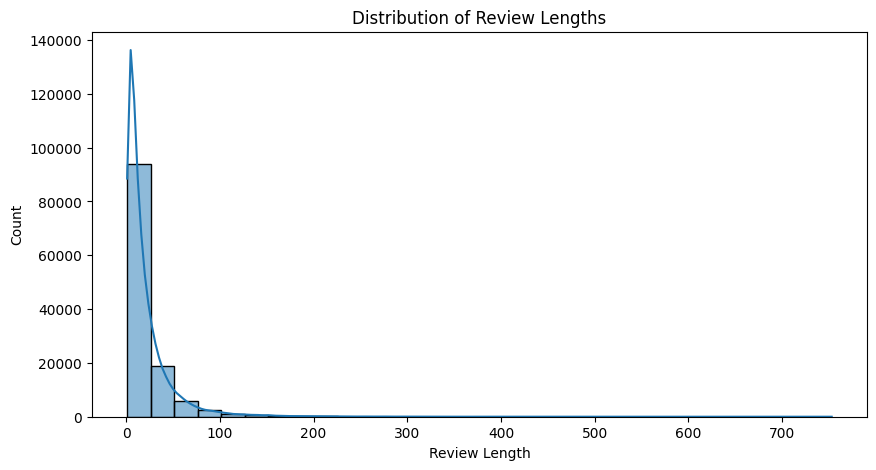

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute review lengths
df_rozetka["review_length"] = df_rozetka["review"].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_rozetka["review_length"], bins=30, kde=True)

plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()


In [54]:
df_rozetka.head()
df_rozetka['review_length'].describe()

count    124083.000000
mean         21.230096
std          28.902344
min           1.000000
25%           5.000000
50%          12.000000
75%          26.000000
max         753.000000
Name: review_length, dtype: float64

In [44]:
df_rozetka["review"][1], len(df_rozetka["review"][1].split())

('За такі гроші це самий топ ', 6)

In [70]:
df_rozetka_75 = df_rozetka[(df_rozetka["review_length"] >= 15) & (df_rozetka["review_length"] <= 30)]
df_rozetka_75.describe()

,rating,review_length
count,29605.000000,29605.000000
mean,4.361966,21.210404
std,1.173175,4.512351
min,1.000000,15.000000
25%,4.000000,17.000000
50%,5.000000,21.000000
75%,5.000000,25.000000
max,5.000000,30.000000


In [72]:
df_rozetka_75.shape

(29605, 14)

In [73]:
df_rozetka_75.head()

,review,review_translate,rating,entity_name,dataset_name,title_translate,translated,review_translate_sentences,review_translate_sentences_tokens,review_translate_sentences_pos,review_translate_sentences_lemma,is_question,sentiment,review_length
3,Виконує свою роботу не погано.але що ви хотіли...,Виконує свою роботу не погано . але що ви хоті...,4.0,voin_v_80,rozetka,NaN,False,"['Виконує свою роботу не погано .', 'але що ви...","[['Виконує', 'свою', 'роботу', 'не', 'погано',...","[['VERB', 'NPRO', 'NOUN', 'PRCL', 'NOUN', 'PNC...","[['виконувати', 'свій', 'робот', 'не', 'погана...","[False, True, True, False, False]",Positive,24
8,Я придбав саме такий гель раніше і маючи велик...,Я придбав саме такий гель раніше і маючи велик...,5.0,losk-9000101535693,rozetka,NaN,False,['Я придбав саме такий гель раніше і маючи вел...,"[['Я', 'придбав', 'саме', 'такий', 'гель', 'ра...","[['NPRO', 'VERB', 'PRCL', 'NPRO', 'NOUN', 'ADJ...","[['я', 'придбати', 'саме', 'такий', 'гель', 'р...",[False],Positive,19
19,Займає мало місця на відміну від каркасного. Д...,Займає мало місця на відміну від каркасного . ...,5.0,232148839,rozetka,NaN,False,['Займає мало місця на відміну від каркасного ...,"[['Займає', 'мало', 'місця', 'на', 'відміну', ...","[['VERB', 'ADVB', 'NOUN', 'INTJ', 'NOUN', 'PRE...","[['займати', 'мало', 'місце', 'на', 'відміна',...","[False, False, False]",Positive,27
20,дві неділі роботи і почав різати швидкість на ...,дві неділі роботи і почав різати швидкість на ...,1.0,3970496,rozetka,NaN,False,['дві неділі роботи і почав різати швидкість н...,"[['дві', 'неділі', 'роботи', 'і', 'почав', 'рі...","[['NUMR', 'NOUN', 'NOUN', 'CONJ', 'VERB', 'VER...","[['два', 'неділя', 'робот', 'і', 'почати', 'рі...","[False, False]",Negative,19
21,За таку ціну ідеальний вибір. При роботі не пе...,За таку ціну ідеальний вибір . При роботі не п...,4.0,intertool_dt_2416,rozetka,NaN,False,"['За таку ціну ідеальний вибір .', 'При роботі...","[['За', 'таку', 'ціну', 'ідеальний', 'вибір', ...","[['ADVB', 'NPRO', 'NOUN', 'ADJF', 'NOUN', 'PNC...","[['за', 'такий', 'ціна', 'ідеальний', 'вибір',...","[False, False, False]",Positive,28


In [74]:
df_rozetka_75['sentiment'].value_counts()

sentiment
Positive    24675
Negative     3222
Neutral      1708
Name: count, dtype: int64

In [75]:
# Separate reviews by sentiment
df_negative = df_rozetka_75[df_rozetka["sentiment"] == "Negative"]
df_neutral = df_rozetka_75[df_rozetka["sentiment"] == "Neutral"]
df_positive = df_rozetka_75[df_rozetka["sentiment"] == "Positive"]

samples_per_group = 70

# Sample an equal number of examples from each group
df_negative_sample = df_negative.sample(samples_per_group, random_state=42)
df_neutral_sample = df_neutral.sample(samples_per_group, random_state=42)
df_positive_sample = df_positive.sample(samples_per_group, random_state=42)

# Concatenate the samples into one DataFrame
final_df = pd.concat([df_negative_sample, df_neutral_sample, df_positive_sample])

# Shuffle the final dataset to mix the sentiment groups
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/4041936451.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_negative = df_rozetka_75[df_rozetka["sentiment"] == "Negative"]
/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/4041936451.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_neutral = df_rozetka_75[df_rozetka["sentiment"] == "Neutral"]
/var/folders/67/9dfj9zw56bd48qqgrsrn6xj00000gn/T/ipykernel_12317/4041936451.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_positive = df_rozetka_75[df_rozetka["sentiment"] == "Positive"]


In [82]:
final_df = final_df.drop(['review_translate', 'title_translate', 'translated'], axis=1)

In [83]:
final_df.head()

,review,rating,entity_name,dataset_name,review_translate_sentences,review_translate_sentences_tokens,review_translate_sentences_pos,review_translate_sentences_lemma,is_question,sentiment,review_length
0,Звертаюся до Розетки чи до представника бренду...,1.0,vitals_53951,rozetka,['Звертаюся до Розетки чи до представника брен...,"[['Звертаюся', 'до', 'Розетки', 'чи', 'до', 'п...","[['VERB', 'NOUN', 'NOUN', 'PRCL', 'NOUN', 'NOU...","[['звертатися', 'до', 'розетка', 'чи', 'до', '...","[False, False, False]",Negative,23
1,Купила собі цей чудо робот-пилосос. Задоволена...,5.0,dyxon-megavac-1200-white,rozetka,"['Купила собі цей чудо робот - пилосос .', 'За...","[['Купила', 'собі', 'цей', 'чудо', 'робот', '-...","[['VERB', 'NOUN', 'NPRO', 'NOUN', 'NOUN', 'PNC...","[['купити', 'соб', 'цей', 'чудо', 'робот', '-'...","[False, False, False, False]",Positive,17
2,Одноразовий. Дитя папу раз його торкнувся і вс...,3.0,310853703,rozetka,"['Одноразовий .', 'Дитя папу раз його торкнувс...","[['Одноразовий', '.'], ['Дитя', 'папу', 'раз',...","[['ADJF', 'PNCT'], ['NOUN', 'NOUN', 'NOUN', 'N...","[['одноразовий', '.'], ['дитя', 'папа', 'раз',...","[False, False]",Neutral,21
3,Дешеві пігулки. Якщо ніякого ефекту не буде - ...,4.0,enthermeal_ad3znc60em089,rozetka,"['Дешеві пігулки .', 'Якщо ніякого ефекту не б...","[['Дешеві', 'пігулки', '.'], ['Якщо', 'ніякого...","[['ADJF', 'NOUN', 'PNCT'], ['CONJ', 'NPRO', 'N...","[['дешевий', 'пігулка', '.'], ['якщо', 'ніякий...","[False, False, False, False]",Positive,24
4,Отримала сьогодні тискомір не той що замовила?...,1.0,251959466,rozetka,['Отримала сьогодні тискомір не той що замовил...,"[['Отримала', 'сьогодні', 'тискомір', 'не', 'т...","[['VERB', 'ADVB', 'NOUN', 'PRCL', 'NPRO', 'CON...","[['отримати', 'сьогодні', 'тискомір', 'не', 'т...","[False, False, False, False]",Negative,26


In [84]:
final_df['sentiment'].value_counts()

sentiment
Negative    70
Positive    70
Neutral     70
Name: count, dtype: int64

In [85]:
final_df['review_length'].describe()

count    210.000000
mean      21.795238
std        4.621665
min       15.000000
25%       17.000000
50%       21.000000
75%       26.000000
max       30.000000
Name: review_length, dtype: float64

In [86]:
final_df.shape

(210, 11)

In [87]:
final_df.to_csv('balanced_reviews.csv', index=True)